With the emergence of Machine Learning and AI, we’re now able to utilize these tools and make predictions using big data at a level that we could have never previously imagined. However, despite all these tools that are available at our disposal, it is still important on how we apply the data in a business context, and how we make the most out of it.

For retailers, more specifically book retailers, we can work with big data using consumer reviews from books that were purchased, and then use those ratings to make recommendations, for similar books that interests our consumers, with the goal of recurring businesses and improved sales.

The dataset that we are using is from “GoodReads,” which is a website that allows users to freely search their database for books and book reviews. For this project, we will be using content-based model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
books = pd.read_csv('books.csv')
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [3]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [4]:
book_tags = pd.read_csv('book_tags.csv')
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [5]:
tags = pd.read_csv('tags.csv')
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


Datasets details:
- ratings.csv: contains ratings and looks like that:
- toread.csv: provides IDs of the books marked "to read" by each user, as userid,book_id pairs.
- books.csv: has metadata for each book (goodreads IDs, authors, title, average rating, etc.).
- book_tags.csv: contains tags/shelves/genres assigned by users to books. Tags in this file are represented by their IDs.
- tags.csv: contains the tag_names corresponding to the tag_ids.

As the name suggests ratings.csv contains all users’s ratings of the books (a total of 980k ratings, for 10,000 books, from 53,424 users).

## Books

In [6]:
books.shape

(10000, 23)

In [7]:
books.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

Features

book_id: A unique Identification number for each book.

best_book_id: generally point to the most popular edition of a given book.

work_id: refers to the book in the abstract sense.

books_count: number of editions.

isbn: Another unique number to identify the book, the International Standard Book Number.

isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.

authors: Names of the authors of the book. Multiple authors are delimited with ,.

original_publication_year: year when the book was first published.

title: The name under which the book was published.

language_code: Helps understand what is the primary language of the book. For instance, eng is standard for English.

average_rating: The average rating of the book received in total.

ratings_count: Total number of ratings the book received.

work_text_reviews_count: Total number of written text reviews the book received.

ratings_1: Total number of ratings of 1.

ratings_2: Total number of ratings of 2.

ratings_3: Total number of ratings of 3.

ratings_4: Total number of ratings of 4.

ratings_5: Total number of ratings of 5.

# Data Cleaning

## Handle Missing Data

In [9]:
books.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [10]:
books.dropna(inplace=True)
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [11]:
books.isnull().sum()

book_id                      0
goodreads_book_id            0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64

## Handle Duplicated Books

In [12]:
books[books.title.duplicated(keep=False)==True].sort_values('title')

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
348,349,11590,11590,3048937,211,450031063,9.780450e+12,Stephen King,1975.0,Salem's Lot,...,228680,246360,6167,2713,11724,57171,89196,85556,https://images.gr-assets.com/books/1327891565m...,https://images.gr-assets.com/books/1327891565s...
1291,1292,5413,5413,40802405,22,385516487,9.780386e+12,"Stephen King, Jerry N. Uelsmann",2005.0,'Salem's Lot The Illustrated Edition,...,72797,74725,482,460,1854,12040,24920,35451,https://images.gr-assets.com/books/1320478491m...,https://images.gr-assets.com/books/1320478491s...
6480,6481,384597,384597,1303332,24,571169341,9.780571e+12,Tom Stoppard,1993.0,Arcadia,...,15362,16149,749,291,713,2408,4948,7789,https://images.gr-assets.com/books/1463617930m...,https://images.gr-assets.com/books/1463617930s...
6104,6105,11866694,11866694,16823763,23,1401340873,9.781401e+12,Lauren Groff,2012.0,Arcadia,...,14622,16274,2444,471,1471,4757,6233,3342,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
578,579,197084,197084,1837885,44,1713221,9.780002e+12,P.D. Eastman,1960.0,Are You My Mother?,...,174204,177809,1864,3986,8065,31523,45916,88319,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
5786,5787,11566956,11566956,16507555,15,618982507,9.780619e+12,Alison Bechdel,2012.0,Are You My Mother?: A Comic Drama,...,18618,19688,2585,697,2193,5326,6382,5090,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
7448,7449,6345193,6345193,6448995,44,805090800,9.780805e+12,Paul Auster,2009.0,Invisible,...,11706,13897,1093,243,1002,3988,5957,2707,https://images.gr-assets.com/books/1317063578m...,https://images.gr-assets.com/books/1317063578s...
5556,5557,18656055,18656055,26470742,39,316405345,9.780316e+12,"James Patterson, David Ellis",2014.0,Invisible,...,14518,18967,2006,268,705,3536,7704,6754,https://images.gr-assets.com/books/1403166141m...,https://images.gr-assets.com/books/1403166141s...
7461,7462,456,456,1128381,50,140178139,9.780140e+12,Paul Auster,1992.0,Leviathan,...,10002,11794,517,105,490,2684,5165,3350,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
3551,3552,91953,91953,680963,364,140431950,9.780140e+12,"Thomas Hobbes, C.B. Macpherson",1651.0,"Leviathan or The Matter, Forme and Power of a ...",...,26284,28699,505,850,2688,8639,9692,6830,https://images.gr-assets.com/books/1326788684m...,https://images.gr-assets.com/books/1326788684s...


While there are a few duplicated books and we can get rid of duplicates by combining them through features such as ratings, ratings_count, it should be noted that the duplicates differ in some features like publication year or language code. 

# Exploratory Data Analysis

## Books

In [13]:
def plot_books_by(df, col, n_rows=10):
    plt.figure(figsize=(12,7))
    ax = sns.barplot(x=df[col].head(n_rows), y=df['title'].head(n_rows), data=df)
    plt.title('Best ' + str(n_rows) + ' books by ' + col.replace('_',' ').capitalize(), weight='bold')
    plt.xlabel('Score of ' + col)
    plt.ylabel('Book Title')  

In [14]:
important_columns = ['title','authors','average_rating','ratings_count','work_text_reviews_count']

### Top Rated Books

In [1]:
book_sorted_ratings = books[books['ratings_count']>=1000].sort_values('average_rating', ascending=False)
book_sorted_ratings[important_columns].head(15)

NameError: name 'books' is not defined

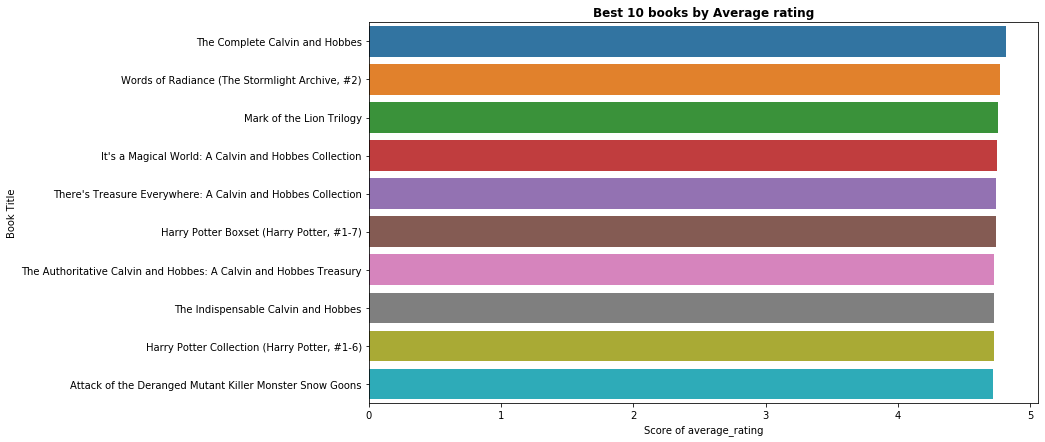

In [16]:
plot_books_by(book_sorted_ratings, 'average_rating', 10)

### Top Popular Books

In [17]:
book_sorted_ratings_count = books.sort_values('ratings_count', ascending=False)
book_sorted_ratings_count[important_columns].head(15)

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,4780653,155254
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4.44,4602479,75867
2,"Twilight (Twilight, #1)",Stephenie Meyer,3.57,3866839,95009
3,To Kill a Mockingbird,Harper Lee,4.25,3198671,72586
4,The Great Gatsby,F. Scott Fitzgerald,3.89,2683664,51992
5,The Fault in Our Stars,John Green,4.26,2346404,140739
6,The Hobbit,J.R.R. Tolkien,4.25,2071616,37653
7,The Catcher in the Rye,J.D. Salinger,3.79,2044241,44920
9,Pride and Prejudice,Jane Austen,4.24,2035490,49152
8,"Angels & Demons (Robert Langdon, #1)",Dan Brown,3.85,2001311,25112


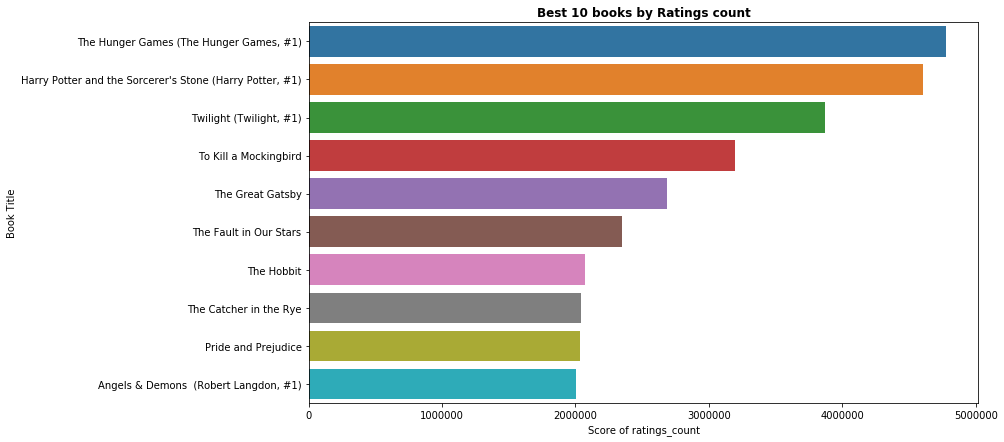

In [18]:
plot_books_by(book_sorted_ratings_count, 'ratings_count', 10)

### Top Text-Reviewed Books

In [19]:
book_sorted_reviews_count = books[books['ratings_count']>=1000].sort_values('work_text_reviews_count', ascending=False)
book_sorted_reviews_count[important_columns].head(15)

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,4780653,155254
5,The Fault in Our Stars,John Green,4.26,2346404,140739
29,Gone Girl,Gillian Flynn,4.03,512475,121614
11,"Divergent (Divergent, #1)",Veronica Roth,4.24,1903563,101023
19,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,4.03,1719760,96274
2,"Twilight (Twilight, #1)",Stephenie Meyer,3.57,3866839,95009
46,The Book Thief,Markus Zusak,4.36,1159741,93611
60,The Girl on the Train,Paula Hawkins,3.88,1008778,93600
16,"Catching Fire (The Hunger Games, #2)",Suzanne Collins,4.30,1831039,88538
30,The Help,Kathryn Stockett,4.45,1531753,78204


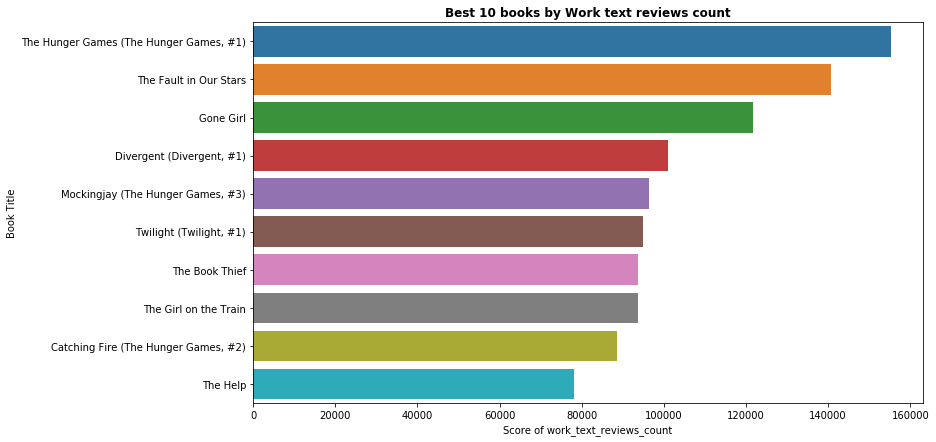

In [20]:
plot_books_by(book_sorted_reviews_count, 'work_text_reviews_count', 10)

### Language

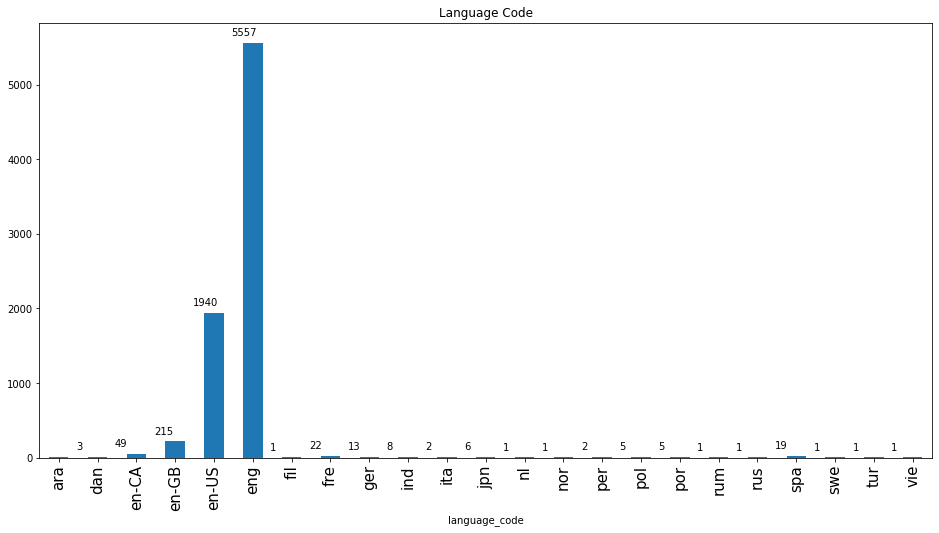

In [21]:
plt.figure(figsize=(16,8))
ax = books.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

### Publication Year

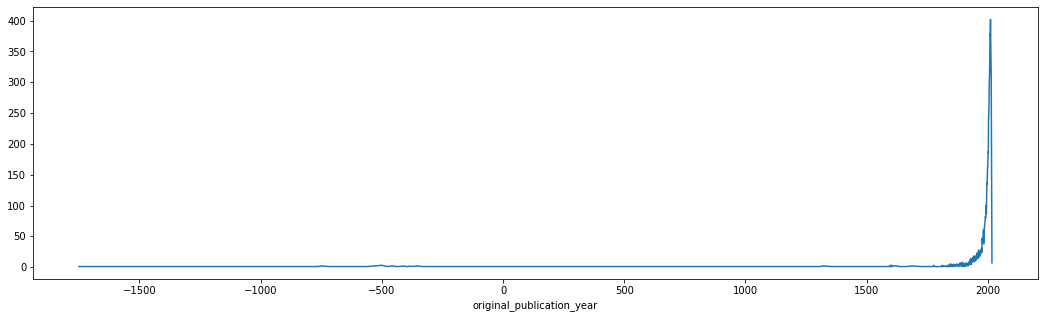

In [22]:
books['original_publication_year'] = books['original_publication_year'].astype(int)
year_count = books.groupby('original_publication_year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

books released after the year 1900

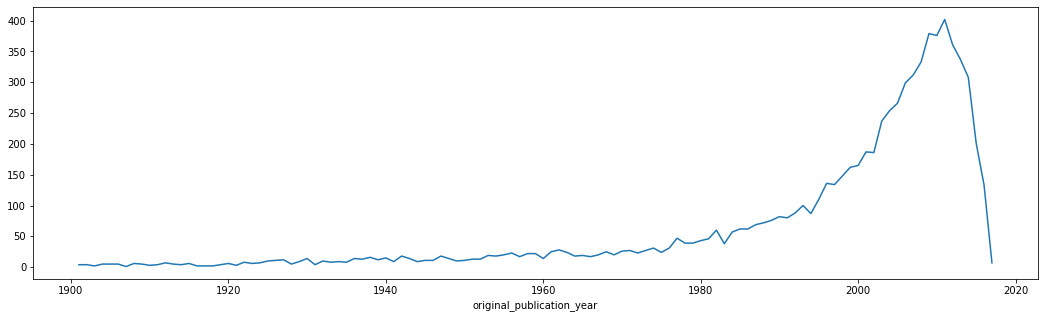

In [23]:
plt.figure(figsize=(18,5))
year_count[year_count.index > 1900].plot();

books released after the year 2000

In [24]:
books.groupby('original_publication_year')['title'].count()[books.groupby('original_publication_year')['title'].count()>200]

original_publication_year
2003    237
2004    254
2005    266
2006    299
2007    312
2008    333
2009    379
2010    376
2011    402
2012    361
2013    337
2014    308
2015    201
Name: title, dtype: int64

In [25]:
books[['title', 'original_publication_year']].sort_values('original_publication_year').head(10)

,title,original_publication_year
2075,The Epic of Gilgamesh,-1750
2141,The Iliad/The Odyssey,-762
340,The Iliad,-750
6165,The I Ching or Book of Changes,-750
78,The Odyssey,-720
1119,Aesop's Fables,-560
9678,The Upanishads: Translations from the Sanskrit,-500
402,The Art of War,-500
5636,The Dhammapada,-500
7777,The Analects,-476


In [26]:
books[['book_id', 'title', 'original_publication_year']].sort_values('original_publication_year').tail(10)

,book_id,title,original_publication_year
6427,6428,"Short Stories from Hogwarts of Heroism, Hardsh...",2016
8043,8044,Holding Up the Universe,2016
1785,1786,Before the Fall,2016
8684,8685,Behind Her Eyes,2017
7559,7560,Caraval,2017
7466,7467,The Girl Before,2017
7372,7373,A Court of Wings and Ruin (A Court of Thorns a...,2017
7447,7448,"King's Cage (Red Queen, #3)",2017
9391,9392,Lincoln in the Bardo,2017
9568,9569,The Hate U Give,2017


## Authors

In [27]:
books.authors.value_counts()

Nora Roberts                                58
Stephen King                                53
Terry Pratchett                             40
Agatha Christie                             38
Dean Koontz                                 34
                                            ..
Gayle Tzemach Lemmon                         1
A.W. Tozer                                   1
Beverly Cleary, Tracy Dockray                1
Steve Perry, Tom Clancy, Steve Pieczenik     1
Jacqueline Davies                            1
Name: authors, Length: 3757, dtype: int64

In [28]:
c = []
books.authors.apply(lambda x: c.append(x) if 'Agatha Christie' in x else [])
c

['Agatha Christie',
 'Agatha Christie, Ροζίτα Σώκου',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Mary Westmacott, Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie, Hugh Fraser',
 'Agatha Christie, Robin Bailey',
 'Agatha Christie']

In [29]:
print('The real number of books (int the data) for Agatha Christie is {} not {}.'.format(len(c),books.authors.value_counts()['Agatha Christie']))

The real number of books (int the data) for Agatha Christie is 42 not 38.


In [30]:
a = []
books.authors.apply(lambda x: a.append(x) if ',' in x else [])
a[:10]

['J.K. Rowling, Mary GrandPré',
 'George Orwell, Erich Fromm, Celâl Üster',
 'Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-Doubleday',
 'Stieg Larsson, Reg Keeland',
 'J.K. Rowling, Mary GrandPré, Rufus Beck',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré']

In [31]:
print('Number of books with multi-authors is {}.'.format(len(a)))

Number of books with multi-authors is 1666.


In [32]:
authors_list = books['authors'].apply(lambda x: [a for a in x.split(', ')] if ',' in x else x)
authors_list.head()

0                  Suzanne Collins
1    [J.K. Rowling, Mary GrandPré]
2                  Stephenie Meyer
3                       Harper Lee
4              F. Scott Fitzgerald
Name: authors, dtype: object

In [33]:
#memisahkan authors 
splitted_authors = authors_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_authors.name = 'authors'
splitted_authors.head()

0    Suzanne Collins
1       J.K. Rowling
1      Mary GrandPré
2    Stephenie Meyer
3         Harper Lee
Name: authors, dtype: object

In [34]:
books_edited_authors = books[important_columns].drop('authors', axis=1).join(splitted_authors)
books_edited_authors.head()

,title,average_rating,ratings_count,work_text_reviews_count,authors
0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,155254,Suzanne Collins
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,75867,J.K. Rowling
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,75867,Mary GrandPré
2,"Twilight (Twilight, #1)",3.57,3866839,95009,Stephenie Meyer
3,To Kill a Mockingbird,4.25,3198671,72586,Harper Lee


In [35]:
books.shape, books_edited_authors.shape

((7860, 23), (10507, 5))

In [36]:
books_edited_authors.authors.value_counts()

Stephen King            85
James Patterson         81
Nora Roberts            63
Dean Koontz             50
Terry Pratchett         46
                        ..
Robert Siegel            1
Gayle Tzemach Lemmon     1
A.W. Tozer               1
Gerald McCann            1
Jacqueline Davies        1
Name: authors, Length: 4806, dtype: int64

We can see now the difference as the previous largest number of books was 58 for Nora Robets now it's 85 for Stephen King

In [37]:
def plot_authors_by(df, title, xlabel, n=15, ylabel='Author', y_size=7):
    plt.figure(figsize=(15,y_size))
    ax = sns.barplot(x=df.head(n).values, y=df.head(n).index)
    plt.title(title, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### Authors with most books

In [38]:
authors_most_with_books = books_edited_authors.authors.value_counts()
authors_most_with_books.head(15)

Stephen King           85
James Patterson        81
Nora Roberts           63
Dean Koontz            50
Terry Pratchett        46
Agatha Christie        42
J.D. Robb              40
Neil Gaiman            40
Janet Evanovich        33
Meg Cabot              33
David Baldacci         31
Laurell K. Hamilton    30
Anne Rice              30
John Grisham           27
Michael Connelly       27
Name: authors, dtype: int64

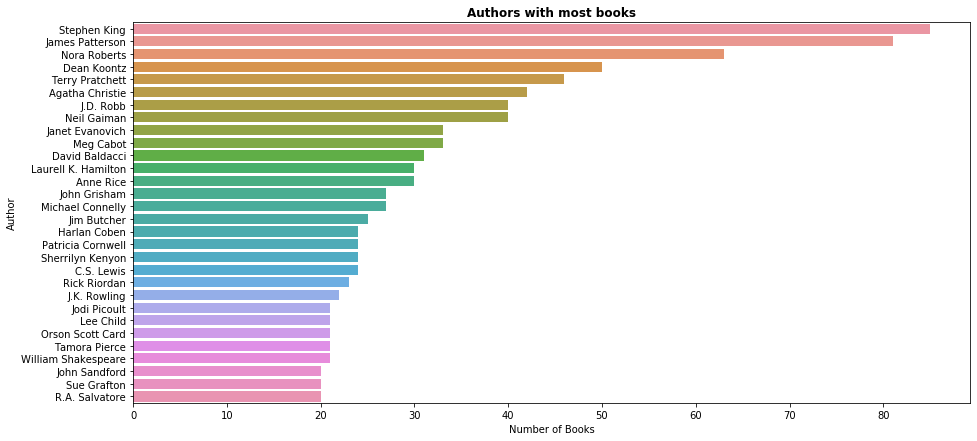

In [39]:
plot_authors_by(authors_most_with_books, 'Authors with most books', 'Number of Books', 30)

For coming analysis we need to filter authors by their number of books & total ratings count, as for an author (with just one book and few ratings of 5), won't be the same for a popular author with avrage-rating of maybe 4.5.

In [40]:
def at_least_books(df, n):
    more_than_n = books_edited_authors['authors'].value_counts().values >= n
    return df['authors'].isin(df['authors'].value_counts()[more_than_n == True].index)

In [41]:
def at_least_ratings_count(df, n):
    return df.ratings_count >= n

In [42]:
at_least_books(books_edited_authors, 5).head()

0     True
1     True
1     True
2     True
3    False
Name: authors, dtype: bool

In [43]:
at_least_ratings_count(books_edited_authors, 10000).head()

0    True
1    True
1    True
2    True
3    True
Name: ratings_count, dtype: bool

Here we do some analysis trying to pick up suitable parameters for functions above.

In [44]:
books_edited_authors['authors'].value_counts().describe()

count    4806.000000
mean        2.186226
std         3.635996
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        85.000000
Name: authors, dtype: float64

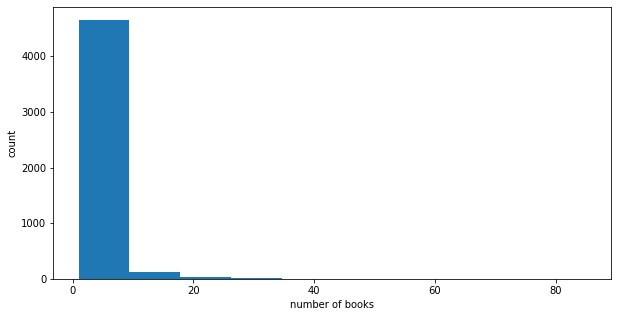

In [45]:
plt.figure(figsize=(10,5))
plt.hist(books_edited_authors.authors.value_counts().values);
plt.xlabel('number of books');
plt.ylabel('count');

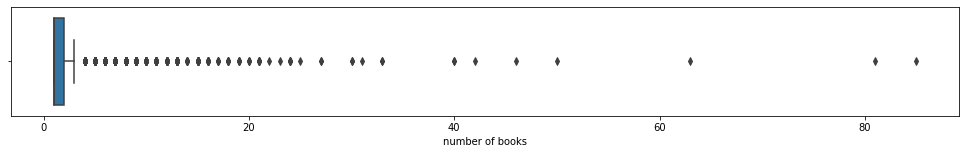

In [46]:
plt.figure(figsize=(17,2))
sns.boxplot(x=books_edited_authors.authors.value_counts(), orient='h');
plt.xlabel('number of books');

In [47]:
books_edited_authors['ratings_count'].describe()

count    1.050700e+04
mean     6.103716e+04
std      1.769880e+05
min      2.773000e+03
25%      1.397900e+04
50%      2.223000e+04
75%      4.520300e+04
max      4.780653e+06
Name: ratings_count, dtype: float64

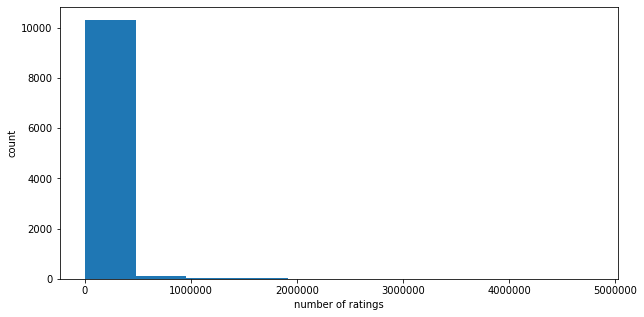

In [48]:
plt.figure(figsize=(10,5))
plt.hist(books_edited_authors['ratings_count']);
plt.xlabel('number of ratings');
plt.ylabel('count');

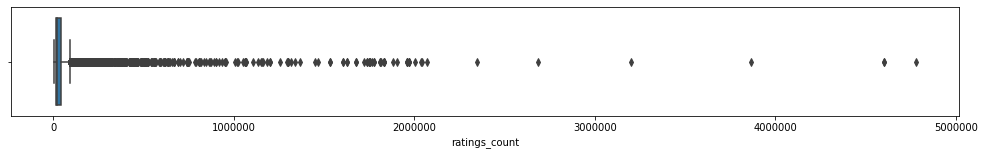

In [49]:
plt.figure(figsize=(17,2))
sns.boxplot(x=books_edited_authors['ratings_count'], orient='h');

In [50]:
a1 = at_least_books(books_edited_authors, 5)
a2 = at_least_ratings_count(books_edited_authors, 50000)

### Best Rating Authors

In [51]:
best_rating_authors = books_edited_authors[a1 & a2].groupby('authors')['average_rating'].mean().sort_values(ascending=False)
best_rating_authors.head(15)

authors
Bill Watterson        4.630000
Francine Rivers       4.600000
Mary GrandPré         4.497143
Sarah J. Maas         4.468750
Clive Barker          4.440000
Takeshi Obata         4.420000
Tsugumi Ohba          4.420000
Fiona Staples         4.410000
George R.R. Martin    4.410000
Brandon Sanderson     4.409000
Cassandra Clare       4.366364
Robert Kirkman        4.365000
Bisco Hatori          4.360000
Richelle Mead         4.350000
A.A. Milne            4.350000
Name: average_rating, dtype: float64

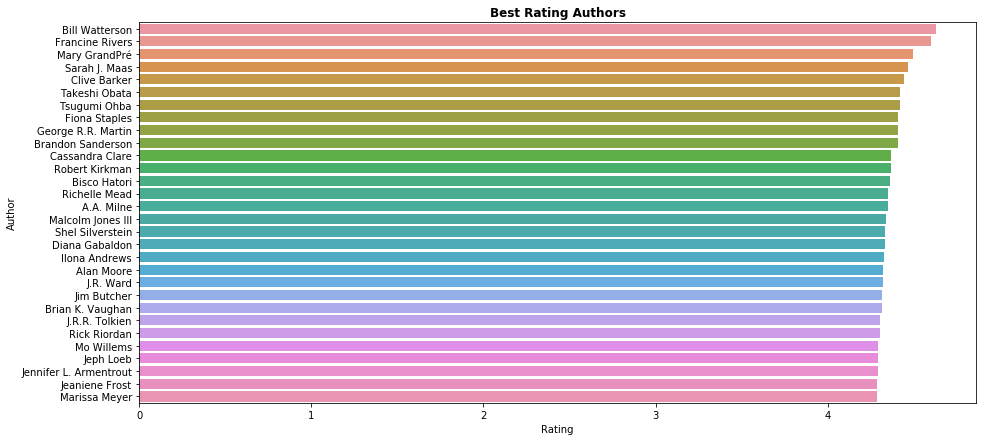

In [52]:
plot_authors_by(best_rating_authors, 'Best Rating Authors', 'Rating', 30)

### Authors with Most Ratings

In [53]:
most_ratings_authors = books_edited_authors.groupby('authors')['ratings_count'].sum().sort_values(ascending=False)
most_ratings_authors.head(15)

authors
J.K. Rowling           16986979
Mary GrandPré          15172370
Suzanne Collins         8613107
Stephenie Meyer         8240392
Stephen King            8045593
J.R.R. Tolkien          5700179
Rick Riordan            5127987
Dan Brown               4984049
William Shakespeare     4393865
Cassandra Clare         4294099
Nicholas Sparks         4274745
John Green              4198002
Jane Austen             4151071
George Orwell           4035503
C.S. Lewis              3943519
Name: ratings_count, dtype: int64

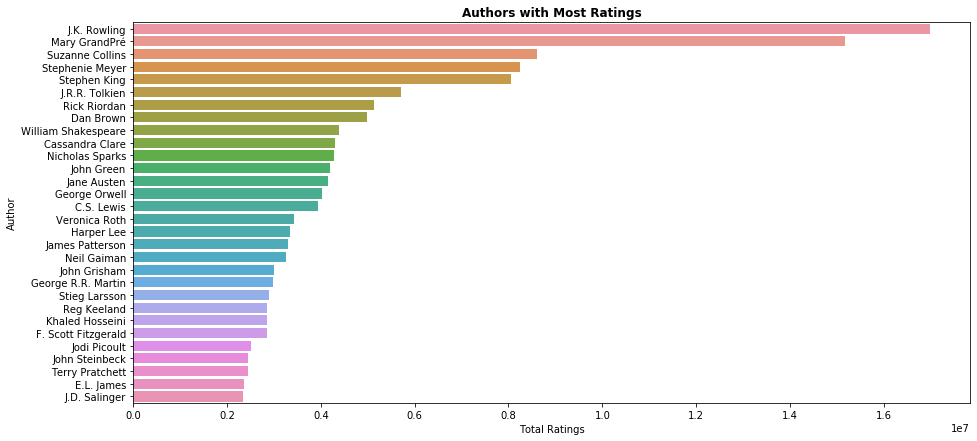

In [54]:
plot_authors_by(most_ratings_authors, 'Authors with Most Ratings', 'Total Ratings', 30)

## Ratings

In [55]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [56]:
print('There are {} ratings.'.format(ratings.shape[0]))

There are 5976479 ratings.


In [57]:
print('Number of users is {}'.format(len(ratings.user_id.unique())))

Number of users is 53424


### Remove Duplicates Ratings

In [58]:
ratings[ratings.duplicated()==True]
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [59]:
ratings[ratings.duplicated(keep=False)==True].head(6)
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [60]:
ratings_rmv_duplicates = ratings.drop_duplicates()
ratings_rmv_duplicates.shape

(5976479, 3)

### Rating Distribution

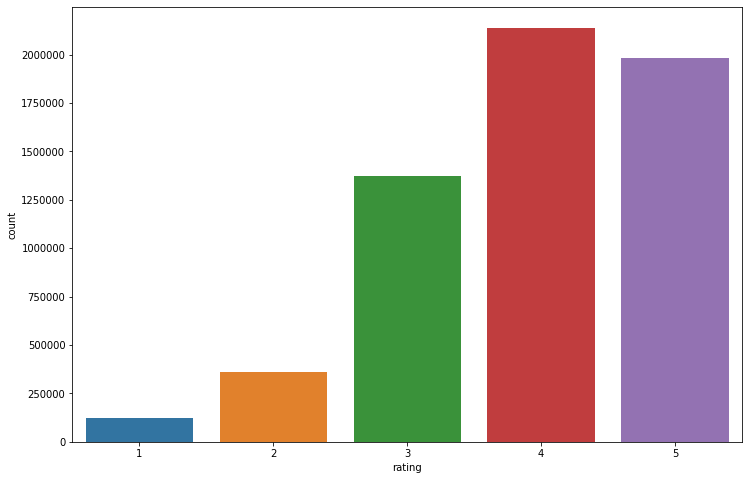

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating', data=ratings);

We see that people tend to give quite positive ratings to books. Most of the ratings are in the 3-5 range, while very few ratings are in the 1-2 range.

### Number of Ratings Per User

In [62]:
ratings_per_user = ratings.groupby('user_id')['user_id'].count()
ratings_per_user

user_id
1        117
2         65
3         91
4        134
5        100
        ... 
53420    110
53421    110
53422    130
53423     77
53424    133
Name: user_id, Length: 53424, dtype: int64

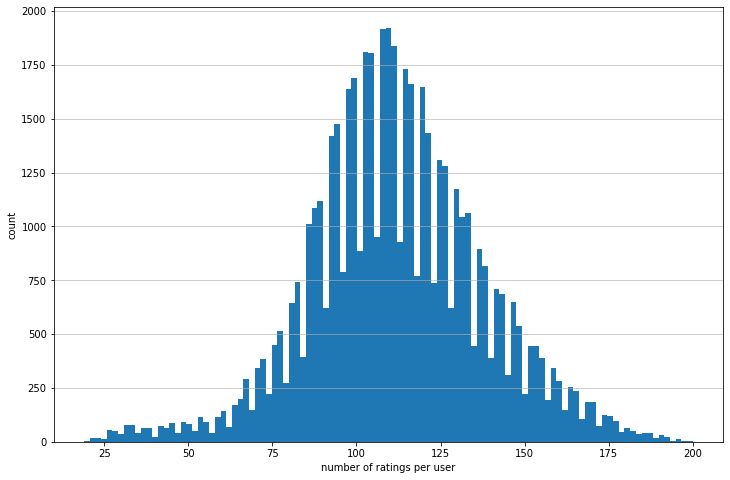

In [63]:
plt.figure(figsize=(12,8))
plt.hist(ratings_per_user ,bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('number of ratings per user')
plt.ylabel('count');

We can see that there are some users with many ratings. This is interesting, because we can later examine whether frequent raters rate books differently from less frequent raters.

### Distribution of mean user rating

In [64]:
mean_rating_per_user = ratings.groupby('user_id')['rating'].mean()
mean_rating_per_user

user_id
1        3.589744
2        4.415385
3        1.736264
4        3.768657
5        4.040000
           ...   
53420    3.345455
53421    4.609091
53422    4.215385
53423    4.454545
53424    4.406015
Name: rating, Length: 53424, dtype: float64

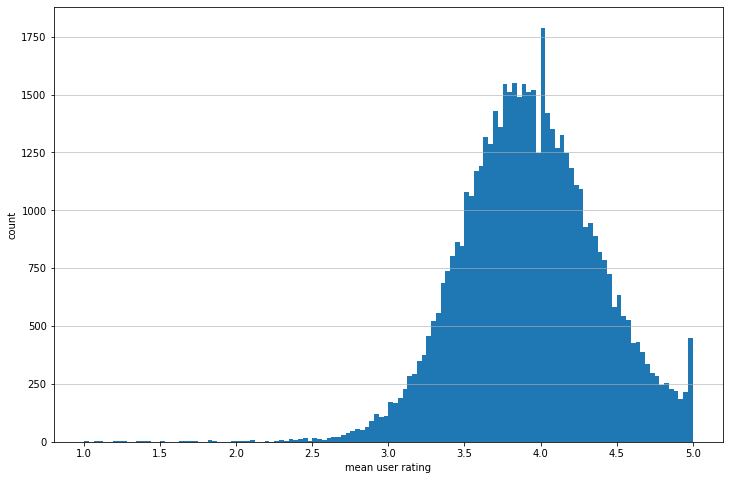

In [65]:
plt.figure(figsize=(12,8))
plt.hist(mean_rating_per_user, bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('mean user rating')
plt.ylabel('count');

People have different tendencies to rate books. Some already give 5 stars to a mediocre book, while others do not give 5 stars unless it is the perfect book for them. Such tendencies can be seen in the figure above. On the right side there is a bump from users with a mean rating of 5, indicating that they really liked all books (or they only rated books they really like…). We can also see that there are nearly no notoriuous downvoters rating all books with a 1. Such tendencies are going to be important for collaborative filtering later, and are typically dealt with by subtracting the user’s mean rating from their ratings.

### Number of ratings per book

In [66]:
ratings_per_book = ratings.groupby('book_id')['book_id'].count()
ratings_per_book

book_id
1        22806
2        21850
3        16931
4        19088
5        16604
         ...  
9996       141
9997        93
9998       102
9999       130
10000      111
Name: book_id, Length: 10000, dtype: int64

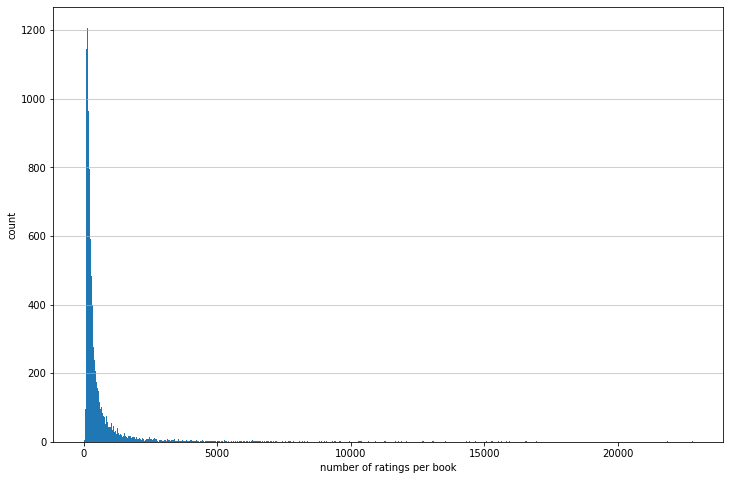

In [67]:
plt.figure(figsize=(12,8))
plt.hist(ratings_per_book ,bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('number of ratings per book')
plt.ylabel('count');

### Distribution of mean book ratings

In [68]:
mean_rating_per_book = ratings.groupby('book_id')['rating'].mean()
mean_rating_per_book

book_id
1        4.279707
2        4.351350
3        3.214341
4        4.329369
5        3.772224
           ...   
9996     4.014184
9997     4.451613
9998     4.323529
9999     3.707692
10000    4.009009
Name: rating, Length: 10000, dtype: float64

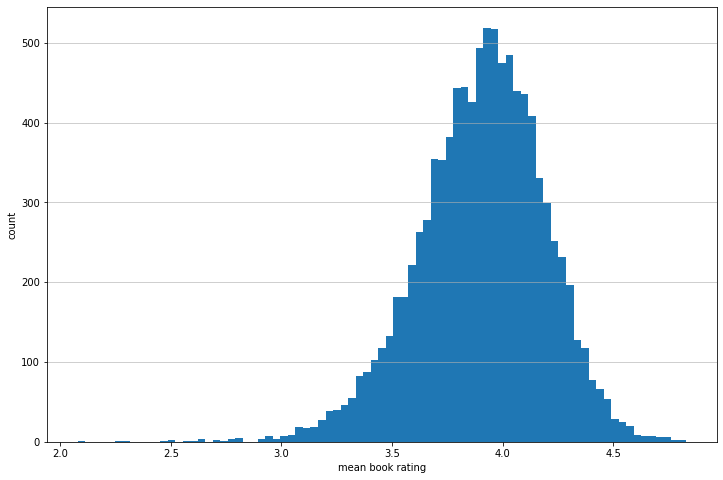

In [69]:
plt.figure(figsize=(12,8))
plt.hist(mean_rating_per_book, bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('mean book rating')
plt.ylabel('count');

Mean book ratings don’t reveal any peculiarities.

## Tags

Tags in this file is self-determined by the users. In this part, I chose only the tags that match the genre tags defined by Goodreads.

In [70]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [71]:
tags.shape

(34252, 2)

In [72]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [73]:
book_tags.shape

(999912, 3)

In [74]:
genres = ["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics",
          "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction",
          "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror",
          "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal",
          "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", 
          "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]

In [75]:
genres = list(map(str.lower, genres))
genres[:4]

['art', 'biography', 'business', 'chick lit']

In [76]:
available_genres = tags.loc[tags.tag_name.str.lower().isin(genres)]

In [77]:
print('Number of available tags is {} out of the {} tags in genres list'.format(available_genres.shape[0], len(genres)))

Number of available tags is 31 out of the 40 tags in genres list


In [78]:
available_books_with_genres = book_tags[book_tags.tag_id.isin(available_genres.tag_id)]
available_books_with_genres.shape

(60573, 3)

In [79]:
tag_counts = pd.DataFrame(available_books_with_genres.groupby('tag_id')['count'].sum())
tag_counts.head()

,count
tag_id,
2938,30262
4605,172444
5951,73249
7077,53864
7457,1756920


In [80]:
tag_counts.set_index(available_genres.tag_name, inplace=True)
tag_counts.head()

,count
tag_name,
art,30262
biography,172444
business,73249
christian,53864
classics,1756920


In [81]:
tag_counts.sort_values('count', ascending=False, inplace=True)
tag_counts.head()

,count
tag_name,
fiction,3688819
fantasy,3548157
classics,1756920
romance,1231926
mystery,872282


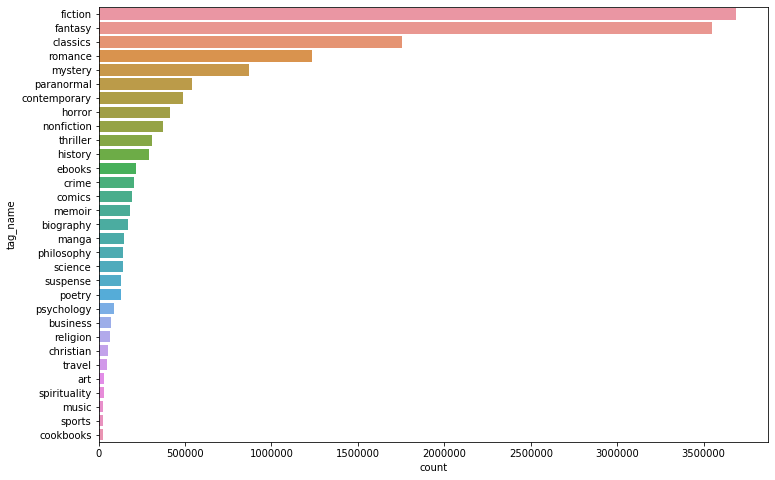

In [82]:
plt.figure(figsize=(12,8))
sns.barplot(x='count', y=tag_counts.index, data=tag_counts, orient='h');

We see that most books are “Fantasy”, “Romance”, or “Mistery” books, while there are not very many “Cookbooks” in the database.

### What determines/influences book ratings

In this part we try to find any associations of features with a book's rating by plotting the correlation matrix between the feature average_rating 

### Correlation

### Is there a relationship between the number of ratings and the average rating?

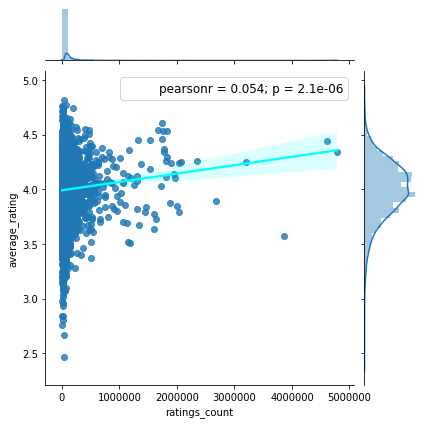

In [83]:
jp = sns.jointplot(x='ratings_count', y='average_rating', kind='reg', line_kws={'color':'cyan'}, data=books)
jp.annotate(stats.pearsonr, fontsize=12);

Theoretically, it might be that the popularity of a book (in terms of the number of ratings it receives) is associated with the average rating it receives, such that once a book is becoming popular it gets better ratings. However, our data shows that this is true only to a very small extent. The correlation between these variables is only 0.045.

### Multiple editions of each book

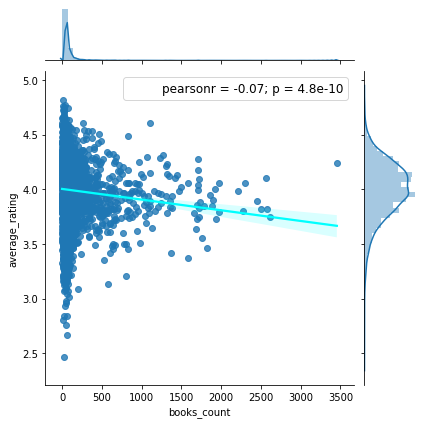

In [84]:
jp = sns.jointplot(x='books_count', y='average_rating', kind='reg', line_kws={'color':'cyan'}, data=books)
jp.annotate(stats.pearsonr, fontsize=12);

The dataset contains information about how many editions of a book are available in books_count. These can either be different editions in the same language or also translations of the book into different languages. So one might assume, that the better the book is the more editions should be available. In fact, data show exactly the opposite pattern: The more editions a book has the lower is the average rating. The causal direction of this association is of course unclear here.

### Do frequent raters rate differently?

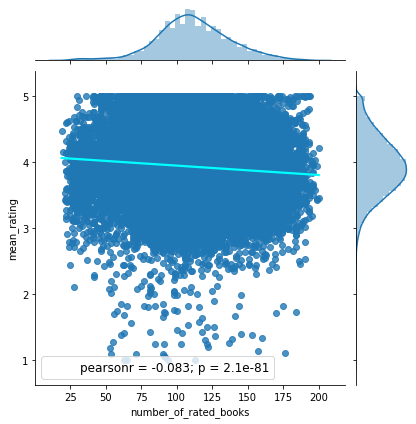

In [85]:
jp = sns.jointplot(x=ratings.groupby('user_id')['user_id'].count(),
                   y=ratings.groupby('user_id')['rating'].mean(),
                   kind='reg', line_kws={'color':'cyan'})
jp.annotate(stats.pearsonr, fontsize=12);
plt.xlabel('number_of_rated_books');
plt.ylabel('mean_rating');

It is possible, that users that rate more books (frequent raters) rate books differently from less frequent raters. The figure above explores this possibility. It seems like frequent raters tend to give lower ratings to books, maybe they are/become more critical the more they read and rate. That’s interesting

### Book Series

The data contains information in the title column about whether a certain book is part of a series (e.g. the Lord of the Rings trilogy).

I examine whether books which are part of a larger series receive a higher rating. In fact the more volumes are in a series, the higher the average rating is.

In [86]:
subtitle = 'the lord of the rings'
books[books.title.str.lower().str.find(subtitle) > -1][['title']].values

array([['The Fellowship of the Ring (The Lord of the Rings, #1)'],
       ['The Two Towers (The Lord of the Rings, #2)'],
       ['The Return of the King (The Lord of the Rings, #3)'],
       ['The Lord of the Rings (The Lord of the Rings, #1-3)'],
       ['J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings'],
       ['The Lord of the Rings: The Art of The Fellowship of the Ring'],
       ['The Lord of the Rings Sketchbook']], dtype=object)

In [87]:
book_series = books[books.title.str.contains('\(.*[,:]') == True][['title', 'average_rating']]
print('There are {} books that are in series'.format(book_series.shape[0]))

There are 3342 books that are in series


In [88]:
book_series.head()

,title,average_rating
0,"The Hunger Games (The Hunger Games, #1)",4.34
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44
2,"Twilight (Twilight, #1)",3.57
8,"Angels & Demons (Robert Langdon, #1)",3.85
11,"Divergent (Divergent, #1)",4.24


In [89]:
series = book_series.copy()
series['title'] = series['title'].str.findall('\(.*[,:]').apply(lambda x: x.pop()[1:-1])
series.head()

,title,average_rating
0,The Hunger Games,4.34
1,Harry Potter,4.44
2,Twilight,3.57
8,Robert Langdon,3.85
11,Divergent,4.24


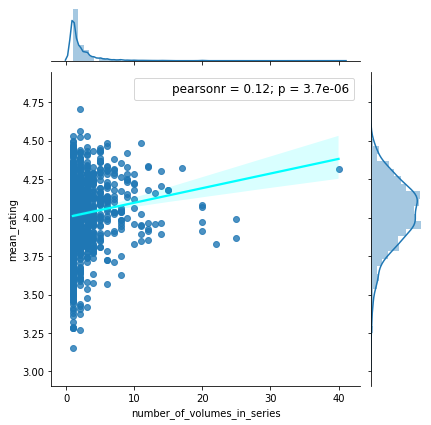

In [90]:
jp = sns.jointplot(x=series.groupby('title')['title'].count(),
                   y=series.groupby('title')['average_rating'].mean(),
                   kind='reg', line_kws={'color':'cyan'})
jp.annotate(stats.pearsonr, fontsize=12);
plt.xlabel('number_of_volumes_in_series');
plt.ylabel('mean_rating');

### Length of Title 

I want to see whether the length of title have any correlation with ratings.

In [91]:
title_length = books[['title', 'average_rating']]
title_length['length'] = title_length['title'].str.findall('\s').apply(lambda x: len(x)+1)
title_length.head()

,title,average_rating,length
0,"The Hunger Games (The Hunger Games, #1)",4.34,7
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,9
2,"Twilight (Twilight, #1)",3.57,3
3,To Kill a Mockingbird,4.25,4
4,The Great Gatsby,3.89,3


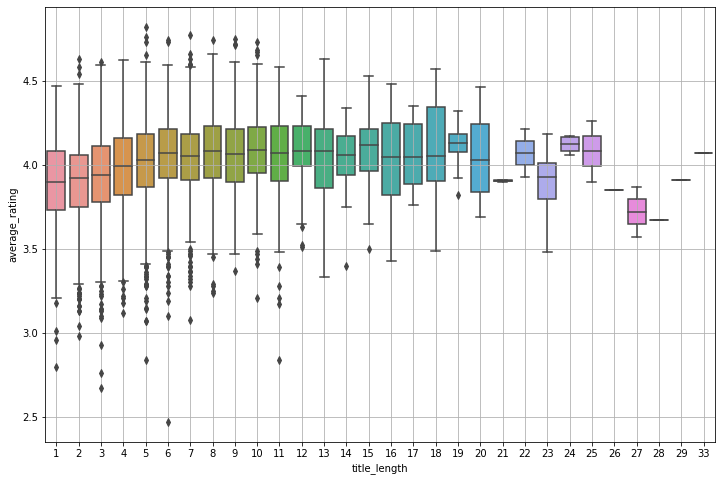

In [92]:
plt.figure(figsize=(12,8))
sns.boxplot(x='length', y='average_rating', data=title_length);
plt.xlabel('title_length');
plt.grid()

### Does books with translations have higher rating?

In [93]:
has_subtitle = books[['title', 'average_rating']]
has_subtitle['has_subtitle'] = title_length['title'].str.contains(':', regex=False)
has_subtitle.head()

,title,average_rating,has_subtitle
0,"The Hunger Games (The Hunger Games, #1)",4.34,False
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,False
2,"Twilight (Twilight, #1)",3.57,False
3,To Kill a Mockingbird,4.25,False
4,The Great Gatsby,3.89,False


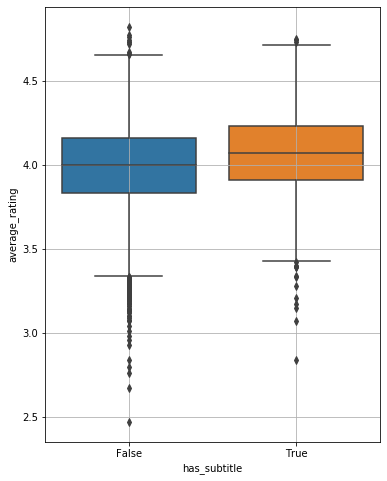

In [94]:
plt.figure(figsize=(6,8))
sns.boxplot(x='has_subtitle', y='average_rating', data=has_subtitle);
plt.grid()

We see that books that have a subtitle get rated slightly higher than books without a subtitle.

In summary, we see only small correlations between the features and the average rating (last row), indicating that there are no strong relationships between the rating a book receives and meta-variables (like rating counts etc.). This means that the rating depends more strongly on other features (e.g. the quality of the books itself)

# Machine Learning

### Content Based Filtering

To personalise our recommendations more, I am going to build an engine that computes similarity between books based on certain metrics and suggests books that are most similar to a particular book that a user liked. Since we will be using book metadata (or content) to build this engine, this also known as Content Based Filtering.

I will build this recommender based on book's Title, Authors and Genres.

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [96]:
books['authors'] = books['authors'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x.split(', ')])

In [97]:
def get_genres(x):
    t = book_tags[book_tags.goodreads_book_id==x]
    return [i.lower().replace(" ", "") for i in tags.tag_name.loc[t.tag_id].values]

In [98]:
books['genres'] = books.book_id.apply(get_genres)

In [99]:
books['new'] = books.apply(lambda x: ' '.join([x['title']] + x['authors'] + x['genres']), axis=1)

In [100]:
books.new.head()

0    The Hunger Games (The Hunger Games, #1) suzann...
1    Harry Potter and the Sorcerer's Stone (Harry P...
2    Twilight (Twilight, #1) stepheniemeyer to-read...
3                      To Kill a Mockingbird harperlee
4    The Great Gatsby f.scottfitzgerald favorites f...
Name: new, dtype: object

In [102]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(books['new'])

### Cosine Similarity

In [103]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [104]:
indices = pd.Series(books.index, index=books['title'])
titles = books['title']

In [105]:
def get_recommendations(title, n=10):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    book_indices = [i[0] for i in sim_scores]
    return list(titles.iloc[book_indices].values)[:n]

In [136]:
get_recommendations("The Great Gatsby")

['Twilight (Twilight, #1)',
 'The Hunger Games (The Hunger Games, #1)',
 'The Fault in Our Stars',
 'Pride and Prejudice',
 "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 'Private Games (Private #3)',
 'The Namesake',
 'Our Mutual Friend',
 'The Catcher in the Rye',
 'Adam']

#### Partial Title

What if I want a specific book but I can't remember it's full name?

I then decided to creat the following method to get book titles from a partial title.

In [107]:
def get_name_from_partial(title):
    return list(books.title[books.title.str.lower().str.contains(title) == True].values)

In [138]:
title = "fire"
l = get_name_from_partial(title)
list(enumerate(l))

[(0, 'Catching Fire (The Hunger Games, #2)'),
 (1, 'Harry Potter and the Goblet of Fire (Harry Potter, #4)'),
 (2, 'A Game of Thrones (A Song of Ice and Fire, #1)'),
 (3, 'The Girl Who Played with Fire (Millennium, #2)'),
 (4, 'A Clash of Kings  (A Song of Ice and Fire, #2)'),
 (5, 'A Storm of Swords (A Song of Ice and Fire, #3)'),
 (6, 'A Feast for Crows (A Song of Ice and Fire, #4)'),
 (7, 'Bared to You (Crossfire, #1)'),
 (8, 'Reflected in You (Crossfire, #2)'),
 (9, 'City of Heavenly Fire (The Mortal Instruments, #6)'),
 (10, 'Firestarter'),
 (11, 'Entwined with You (Crossfire, #3)'),
 (12, 'Firefly Lane (Firefly Lane, #1)'),
 (13, 'Brain on Fire: My Month of Madness'),
 (14, 'The Throne of Fire (Kane Chronicles, #2)'),
 (15, 'Fire (Graceling Realm, #2)'),
 (16, 'The Fires of Heaven (Wheel of Time, #5)'),
 (17, 'Heir of Fire (Throne of Glass, #3)'),
 (18,
  'A Storm of Swords: Blood and Gold (A Song of Ice and Fire, #3: Part 2 of 2)'),
 (19, 'The Bonfire of the Vanities'),
 (20, 'B

#### Including Popularity and Ratings

One thing that we notice about our recommendation system is that it recommends books regardless of ratings and popularity. Therefore, i try to add a mechanism to remove bad books and return books which are popular and have had a good critical response.

I will take the top 30 books based on similarity scores and calculate the vote of the 60th percentile book. Then, using this as the value of  𝑚 , we will calculate the weighted rating of each book the weighted rating formula like we did in the Simple Recommender section.

Weighted Rating (WR) =  (𝑣/𝑣+𝑚.𝑅)+(𝑚/𝑣+𝑚.𝐶)

  - v = df['ratings_count']
  - m = df['ratings_count'].quantile(0.60)
  - R = df['average_rating']
  - C = df['average_rating'].mean()
    df['weighted_rating'] = (R*v + C*m) / (v + m)


In [109]:
v = books['ratings_count']
m = books['ratings_count'].quantile(0.95)
R = books['average_rating']
C = books['average_rating'].mean()
W = (R*v + C*m) / (v + m)

books['weighted_rating'] = W

In [110]:
def improved_recommendations(title, n=10):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    book_indices = [i[0] for i in sim_scores]
    df = books.iloc[book_indices][['title', 'ratings_count', 'average_rating', 'weighted_rating']]

    v = df['ratings_count']
    m = df['ratings_count'].quantile(0.60)
    R = df['average_rating']
    C = df['average_rating'].mean()
    df['weighted_rating'] = (R*v + C*m) / (v + m)
    
    qualified = df[df['ratings_count'] >= m]
    qualified = qualified.sort_values('weighted_rating', ascending=False)
    return qualified.head(n)

In [111]:
improved_recommendations('1984')

,title,ratings_count,average_rating,weighted_rating
10,The Kite Runner,1813044,4.26,4.235273
111,"Me Before You (Me Before You, #1)",587647,4.27,4.204880
32,Memoirs of a Geisha,1300209,4.08,4.072546
354,"Graceling (Graceling Realm, #1)",281185,4.10,4.068580
349,Fear and Loathing in Las Vegas,232489,4.08,4.054799
359,Do Androids Dream of Electric Sheep?,223828,4.08,4.054303
116,"A Wrinkle in Time (A Wrinkle in Time Quintet, #1)",615907,4.04,4.036798
29,Gone Girl,512475,4.03,4.029308
356,All Quiet on the Western Front,249113,3.92,3.969993
352,Othello,238875,3.88,3.950110


### Collaborative Filtering

Our content based engine suffers from some severe limitations. It is only capable of suggesting books which are close to a certain book. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a book will receive the same recommendations for that book, regardless of who s/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Book Readers. Collaborative Filtering is based on the idea that users similar to a me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.


In [112]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors #unsupervise learing model, mencari tetangga terdekat
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### merging data

In [113]:
data = pd.merge(books, ratings, on='book_id')
data.head(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_3,ratings_4,ratings_5,image_url,small_image_url,genres,new,weighted_rating,user_id,rating
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,[suzannecollins],2008,The Hunger Games,...,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"[to-read, fantasy, favorites, currently-readin...","the hunger games (the hunger games, #1) suzann...",4.326207,2886,5
1,1,2767052,2767052,2792775,272,439023483,9.780439e+12,[suzannecollins],2008,The Hunger Games,...,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"[to-read, fantasy, favorites, currently-readin...","the hunger games (the hunger games, #1) suzann...",4.326207,6158,5
2,1,2767052,2767052,2792775,272,439023483,9.780439e+12,[suzannecollins],2008,The Hunger Games,...,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"[to-read, fantasy, favorites, currently-readin...","the hunger games (the hunger games, #1) suzann...",4.326207,3991,4
3,1,2767052,2767052,2792775,272,439023483,9.780439e+12,[suzannecollins],2008,The Hunger Games,...,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"[to-read, fantasy, favorites, currently-readin...","the hunger games (the hunger games, #1) suzann...",4.326207,5281,5
4,1,2767052,2767052,2792775,272,439023483,9.780439e+12,[suzannecollins],2008,The Hunger Games,...,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"[to-read, fantasy, favorites, currently-readin...","the hunger games (the hunger games, #1) suzann...",4.326207,5721,5


#### data exploration

#### mean rating of all books

In [114]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
The Complete Calvin and Hobbes                                       4.829876
Attack of the Deranged Mutant Killer Monster Snow Goons              4.768707
The Indispensable Calvin and Hobbes                                  4.766355
There's Treasure Everywhere: A Calvin and Hobbes Collection          4.760456
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury    4.757202
It's a Magical World: A Calvin and Hobbes Collection                 4.747396
The Calvin and Hobbes Tenth Anniversary Book                         4.728528
The Days Are Just Packed: A Calvin and Hobbes Collection             4.722656
The Divan                                                            4.720000
The Way of Kings, Part 1 (The Stormlight Archive #1.1)               4.711765
Name: rating, dtype: float64

#### count rating of all books


In [115]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
The Hunger Games (The Hunger Games, #1)                        22806
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)       21850
To Kill a Mockingbird                                          19088
Twilight (Twilight, #1)                                        16931
The Great Gatsby                                               16604
Catching Fire (The Hunger Games, #2)                           16549
Mockingjay (The Hunger Games, #3)                              15953
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)    15855
Harry Potter and the Chamber of Secrets (Harry Potter, #2)     15657
The Hobbit                                                     15558
Name: rating, dtype: int64

### rating values groupby book titles

In [116]:
ratings_1= pd.DataFrame(data.groupby('title')['rating'].mean())

#tambah kolom
ratings_1['num_of_ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings_1.head()

,rating,num_of_ratings
title,,
"Angels (Walsh Family, #3)",3.562738,263
'Salem's Lot,3.938868,4433
"'Tis (Frank McCourt, #2)",3.570413,703
"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works",3.838384,297
"100 Bullets, Vol. 1: First Shot, Last Call",3.617647,170


In [117]:
ratings_1.sort_values('num_of_ratings', ascending= False).head()

,rating,num_of_ratings
title,,
"The Hunger Games (The Hunger Games, #1)",4.279707,22806
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4.351350,21850
To Kill a Mockingbird,4.329369,19088
"Twilight (Twilight, #1)",3.214341,16931
The Great Gatsby,3.772224,16604


## Visualisation

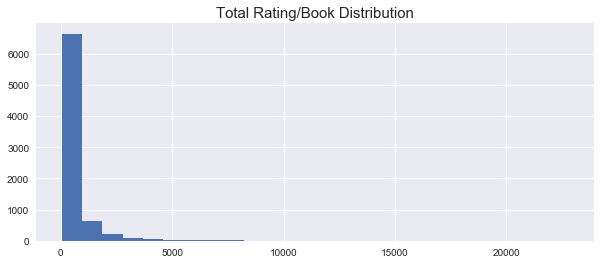

In [118]:
plt.style.use('seaborn')
plt.figure(figsize = (10,4))
ratings_1['num_of_ratings'].hist(bins = 25)
plt.title('Total Rating/Book Distribution', size=15)
plt.show()

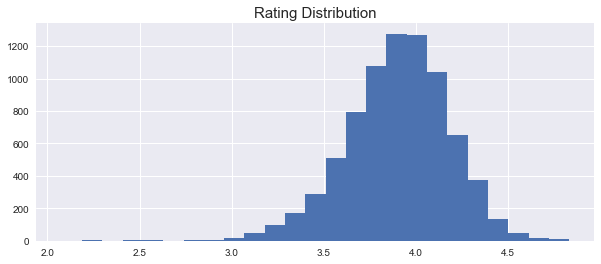

In [119]:
plt.figure(figsize = (10,4))
ratings_1['rating'].hist(bins = 25)
plt.title('Rating Distribution', size = 15)
plt.show()

# **``Recommendation based on 'Book Rating' Correlation``**

In [120]:
booksmat = data.pivot_table(
    index = 'user_id',
    columns = 'title',
    values = 'rating'
).fillna(0)

booksmat.head()

title,"Angels (Walsh Family, #3)",'Salem's Lot,"'Tis (Frank McCourt, #2)","10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works","100 Bullets, Vol. 1: First Shot, Last Call",100 Love Sonnets,100 Selected Poems,"10th Anniversary (Women's Murder Club, #10)","11 Birthdays (Willow Falls, #1)",11/22/63,...,أولاد حارتنا,باب الخروج: رسالة علي المفعمة ببهجة غير متوقعة,حوجن [Ḥawjan],ساق البامبو,سمفونی مردگان,شيكاجو,عقاید یک دلقک,في ديسمبر تنتهي كل الأحلام,キスよりも早く1 [Kisu Yorimo Hayaku 1] (Faster than a Kiss #1),美少女戦士セーラームーン新装版 1 [Bishōjo Senshi Sailor Moon Shinsōban 1]
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### rating record of liked movie

In [121]:
liked_books = 'Dracula'

liked_books_ratings = booksmat[liked_books]
liked_books_ratings.head()

user_id
1    0.0
2    0.0
3    0.0
4    3.0
5    0.0
Name: Dracula, dtype: float64

### __Correlation__

In [122]:
similar_liked_movie = booksmat.corrwith(liked_books_ratings)

In [123]:
#create dataframe
df_books_corr = pd.DataFrame(similar_liked_movie, columns = ['Correlation'])
df_books_corr.dropna(inplace = True)
df_books_corr.head()

,Correlation
title,
"Angels (Walsh Family, #3)",-0.009332
'Salem's Lot,0.148328
"'Tis (Frank McCourt, #2)",-0.004846
"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works",-0.017199
"100 Bullets, Vol. 1: First Shot, Last Call",0.012927


### __Movie Recommendation__

In [124]:
# optional
df_books_corr = df_books_corr.join(ratings_1['num_of_ratings'])
df_books_corr.head()

,Correlation,num_of_ratings
title,,
"Angels (Walsh Family, #3)",-0.009332,263
'Salem's Lot,0.148328,4433
"'Tis (Frank McCourt, #2)",-0.004846,703
"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works",-0.017199,297
"100 Bullets, Vol. 1: First Shot, Last Call",0.012927,170


In [125]:
# rekomendasi film berdasarkan korelasi tertinggi
df_books_corr.sort_values('Correlation', ascending = False).iloc[1:].head()

,Correlation,num_of_ratings
title,,
Frankenstein,0.334256,7727
"Interview with the Vampire (The Vampire Chronicles, #1)",0.220112,5764
The Strange Case of Dr. Jekyll and Mr. Hyde,0.203251,2926
The Picture of Dorian Gray,0.199895,6406
The Strange Case of Dr. Jekyll and Mr. Hyde and Other Tales of Terror,0.196564,1046


In [126]:
# rekomendasi film berdasarkan korelasi rating dengan syarat jumlah rating di atas 100
df_books_corr[df_books_corr['num_of_ratings'] > 200].sort_values('Correlation', ascending = False).iloc[1:].head()

,Correlation,num_of_ratings
title,,
Frankenstein,0.334256,7727
"Interview with the Vampire (The Vampire Chronicles, #1)",0.220112,5764
The Strange Case of Dr. Jekyll and Mr. Hyde,0.203251,2926
The Picture of Dorian Gray,0.199895,6406
The Strange Case of Dr. Jekyll and Mr. Hyde and Other Tales of Terror,0.196564,1046


In [127]:
# rekomendasi film berdasarkan korelasi rating dengan syarat korelasinya di atas 0.2
df_books_corr[df_books_corr['Correlation'] > 0.2].sort_values('Correlation', ascending = False).iloc[1:].head()

,Correlation,num_of_ratings
title,,
Frankenstein,0.334256,7727
"Interview with the Vampire (The Vampire Chronicles, #1)",0.220112,5764
The Strange Case of Dr. Jekyll and Mr. Hyde,0.203251,2926


# **``Recommendation using NearestNeighbors``**

### __Movie Pivot Table__

In [128]:
df_books_pivot = data.pivot_table(
    index = 'book_id',
    columns = 'user_id',
    values = 'rating'
).fillna(0)

df_books_pivot.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
2,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,4.0
4,5.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,0.0,5.0,...,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,5.0,5.0
5,0.0,5.0,0.0,4.0,0.0,0.0,3.0,3.0,5.0,5.0,...,0.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,0.0,0.0


### __Books Matrix__

In [129]:
books_matrix = csr_matrix(df_books_pivot.values)
books_matrix

<7860x53424 sparse matrix of type '<class 'numpy.float64'>'
	with 5311817 stored elements in Compressed Sparse Row format>

### __Fitting Model__

In [130]:
model = NearestNeighbors(metric='cosine', algorithm = 'brute')
model.fit(books_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

### __Books Recommendation__

In [131]:
book = '1984'
item_id = int(pd.DataFrame(data['book_id'][data['title'] == book]).iloc[0])

jarak, indeks = model.kneighbors(df_books_pivot.loc[item_id,:].values.reshape(1,-1), n_neighbors=11)

for i in range(0, len(jarak.flatten())):
    if i==0:
        print("Recommendation for '{0}': \n".format(data[data['book_id'] == item_id]['title'].tolist()[0]))
    else:
        print("{0}:'{1}', with distance: {2}".format(i, 
                                                   data[data['book_id'] == df_books_pivot.index[indeks.flatten()[i]]]['title'].iloc[0],
                                                   jarak.flatten()[i]
                                                  ))

Recommendation for '1984': 

1:'Animal Farm', with distance: 0.3762475332180262
2:'Brave New World', with distance: 0.45165522382215095
3:'The Catcher in the Rye', with distance: 0.49928746712658556
4:'Lord of the Flies', with distance: 0.500618429037635
5:'The Great Gatsby', with distance: 0.5107401410708425
6:'Fahrenheit 451', with distance: 0.5128631621080401
7:'To Kill a Mockingbird', with distance: 0.5265295205752978
8:'The Hobbit', with distance: 0.5456965200617052
9:'Slaughterhouse-Five', with distance: 0.5562633309155776
10:'Of Mice and Men', with distance: 0.5598998327007454
